In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.


In [2]:
from datasets import load_dataset

# Load the dataset
ds = load_dataset("flaviagiammarino/path-vqa")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.29k [00:00<?, ?B/s]

(…)-00000-of-00007-f2d0e9ef9f022d38.parquet:   0%|          | 0.00/42.8M [00:00<?, ?B/s]

(…)-00001-of-00007-47d8e0220bf6c933.parquet:   0%|          | 0.00/81.0M [00:00<?, ?B/s]

(…)-00002-of-00007-7fb5037c4c5da7be.parquet:   0%|          | 0.00/104M [00:00<?, ?B/s]

(…)-00003-of-00007-74b9b7b81cc55f90.parquet:   0%|          | 0.00/90.0M [00:00<?, ?B/s]

(…)-00004-of-00007-77eea90af4a55dce.parquet:   0%|          | 0.00/46.1M [00:00<?, ?B/s]

(…)-00005-of-00007-5332ec423be520bd.parquet:   0%|          | 0.00/55.8M [00:00<?, ?B/s]

(…)-00006-of-00007-637a58c700b604af.parquet:   0%|          | 0.00/57.3M [00:00<?, ?B/s]

(…)-00000-of-00003-90a5518d26493b67.parquet:   0%|          | 0.00/41.3M [00:00<?, ?B/s]

(…)-00001-of-00003-cbfe947a3418595c.parquet:   0%|          | 0.00/45.7M [00:00<?, ?B/s]

(…)-00002-of-00003-9ec816895bd3bc20.parquet:   0%|          | 0.00/64.7M [00:00<?, ?B/s]

(…)-00000-of-00003-e9adadb4799f44d3.parquet:   0%|          | 0.00/41.2M [00:00<?, ?B/s]

(…)-00001-of-00003-7ea98873fc919813.parquet:   0%|          | 0.00/45.3M [00:00<?, ?B/s]

(…)-00002-of-00003-1628308435019820.parquet:   0%|          | 0.00/69.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/19654 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/6259 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/6719 [00:00<?, ? examples/s]

In [3]:
# Check the structure of the dataset
print(ds)

# Display the first few samples from the training set
print(ds['train'].to_pandas().head())

DatasetDict({
    train: Dataset({
        features: ['image', 'question', 'answer'],
        num_rows: 19654
    })
    validation: Dataset({
        features: ['image', 'question', 'answer'],
        num_rows: 6259
    })
    test: Dataset({
        features: ['image', 'question', 'answer'],
        num_rows: 6719
    })
})
                                               image  \
0  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...   
1  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...   
2  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...   
3  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...   
4  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...   

                                            question  \
0   where are liver stem cells (oval cells) located?   
1  what are stained here with an immunohistochemi...   
2  what do the areas of white chalky deposits rep...   
3  is embolus derived from a lower-extremity deep...   
4   how is hyperplasia without atypia characterized?   

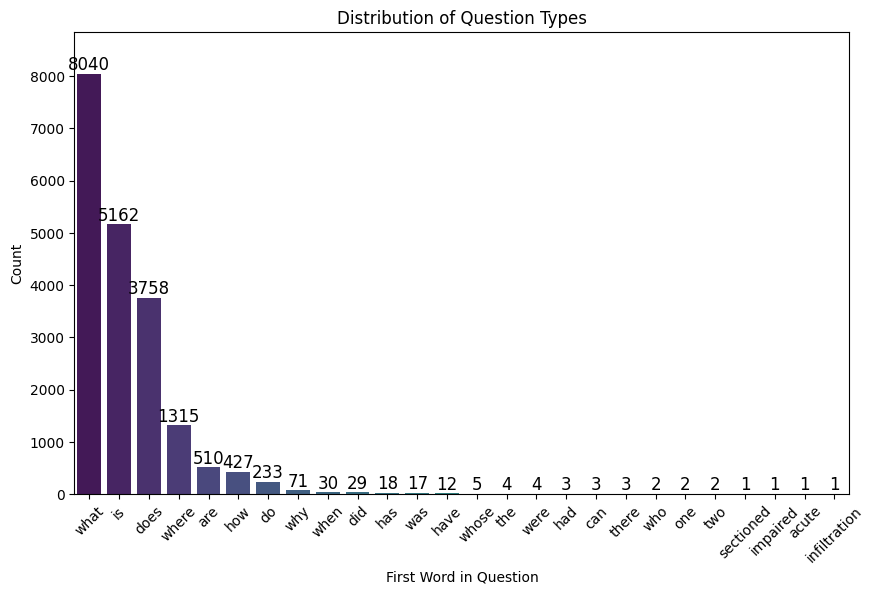

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the dataset to a Pandas DataFrame
df = ds['train'].to_pandas()

# Extract the first word from each question
df['first_word'] = df['question'].str.split().str[0]

# Count the occurrences of each first word
first_word_counts = df['first_word'].value_counts()

# Plot the distribution of the question types
plt.figure(figsize=(10, 6))
sns.barplot(x=first_word_counts.index, y=first_word_counts.values, hue=first_word_counts.index, palette="viridis", legend=False)

# Add count annotations on top of each bar
for i, value in enumerate(first_word_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Question Types')
plt.xlabel('First Word in Question')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.ylim(0, max(first_word_counts.values) * 1.1)
plt.show()

In [5]:
import hashlib
from tqdm import tqdm  # Import tqdm for progress bar

def hash_image(image_bytes):
    # Hash the image bytes using SHA-256
    return hashlib.sha256(image_bytes).hexdigest()

In [6]:
unique_images = set()

for image in tqdm(df['image'], desc="Processing Images"):
    image_bytes = image['bytes']
    unique_images.add(hash_image(image_bytes))
print('')
print(f"Number of unique images in training dataset: {len(unique_images)}")

Processing Images: 100%|██████████| 19654/19654 [00:10<00:00, 1799.51it/s]


Number of unique images in training dataset: 2599


In [7]:
unique_images = set()
testing_data = ds['test'].to_pandas()
for image in tqdm(testing_data['image'], desc="Processing Images"):
    image_bytes = image['bytes']
    unique_images.add(hash_image(image_bytes))
print('')
print(f"Number of unique images in testing dataset: {len(unique_images)}")

Processing Images: 100%|██████████| 6719/6719 [00:04<00:00, 1500.39it/s]


Number of unique images in testing dataset: 858


In [8]:
unique_images = set()
validation_data = ds['validation'].to_pandas()
for image in tqdm(validation_data['image'], desc="Processing Images"):
    image_bytes = image['bytes']
    unique_images.add(hash_image(image_bytes))
print('')
print(f"Number of unique images in validation dataset: {len(unique_images)}")

Processing Images: 100%|██████████| 6259/6259 [00:03<00:00, 2003.38it/s]


Number of unique images in validation dataset: 832


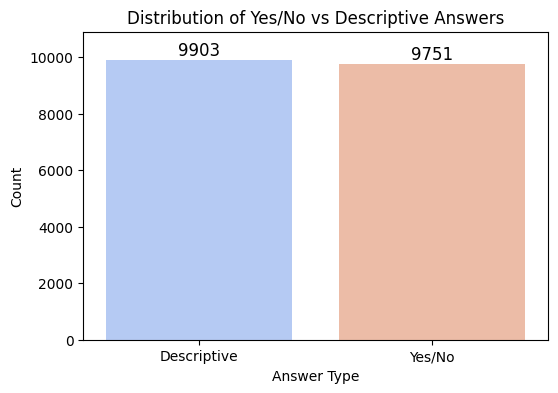

In [9]:
# Define Yes/No and Descriptive categories
df['answer_type'] = df['answer'].apply(lambda x: 'Yes/No' if x.lower() in ['yes', 'no'] else 'Descriptive')

# Count the number of Yes/No and Descriptive answers
answer_type_counts = df['answer_type'].value_counts()

# Visualize the answer types distribution
plt.figure(figsize=(6, 4))
# Use hue to avoid FutureWarning, also set legend=False
ax = sns.barplot(x=answer_type_counts.index, y=answer_type_counts.values, hue=answer_type_counts.index, palette="coolwarm", legend=False)

# Add count annotations on top of each bar
for i, value in enumerate(answer_type_counts.values):
    ax.text(i, value + 10, str(value), ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Yes/No vs Descriptive Answers')
plt.xlabel('Answer Type')
plt.ylabel('Count')
plt.ylim(0, max(answer_type_counts.values) * 1.1)
plt.show()

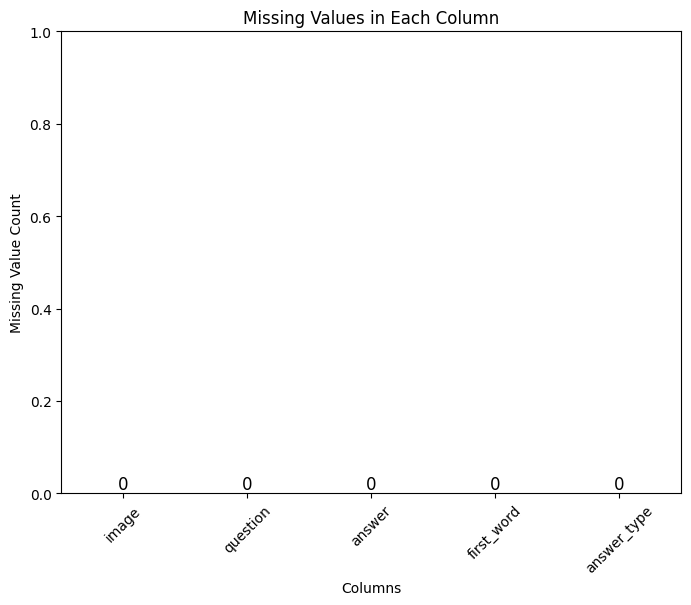

In [10]:
# Count missing values in each column
missing_values = df.isnull().sum()

# Visualize missing values
plt.figure(figsize=(8, 6))
# Use hue to avoid FutureWarning, also set legend=False
sns.barplot(x=missing_values.index, y=missing_values.values, hue=missing_values.index, palette="magma", legend=False)

# Annotate bars with missing values
for i, value in enumerate(missing_values.values):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=12)

plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Missing Value Count')
plt.xticks(rotation=45)

# Set y-limits to avoid UserWarning
plt.ylim(0, max(missing_values.values) * 1.1 if max(missing_values.values) > 0 else 1)
plt.show()

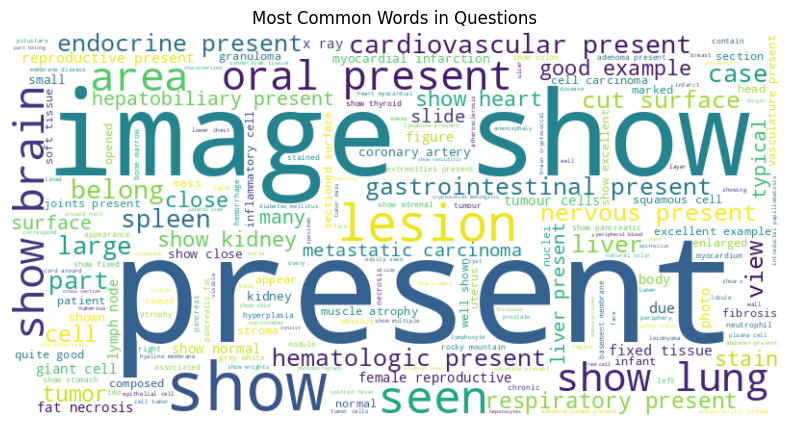

In [11]:
from wordcloud import WordCloud

# Combine all questions into one string
text = ' '.join(df['question'].tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Questions')
plt.show()

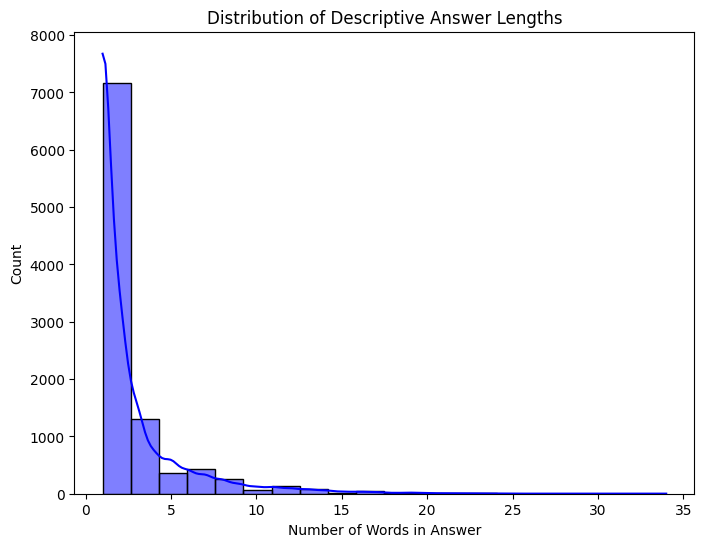

In [12]:
# Filter descriptive answers and create a copy to avoid SettingWithCopyWarning
descriptive_answers = df[df['answer_type'] == 'Descriptive'].copy()

# Calculate answer length (in words)
descriptive_answers['answer_length'] = descriptive_answers['answer'].apply(lambda x: len(x.split()))

# Visualize the distribution of answer lengths
plt.figure(figsize=(8, 6))
sns.histplot(descriptive_answers['answer_length'], bins=20, kde=True, color='blue')
plt.title('Distribution of Descriptive Answer Lengths')
plt.xlabel('Number of Words in Answer')
plt.ylabel('Count')
plt.show()


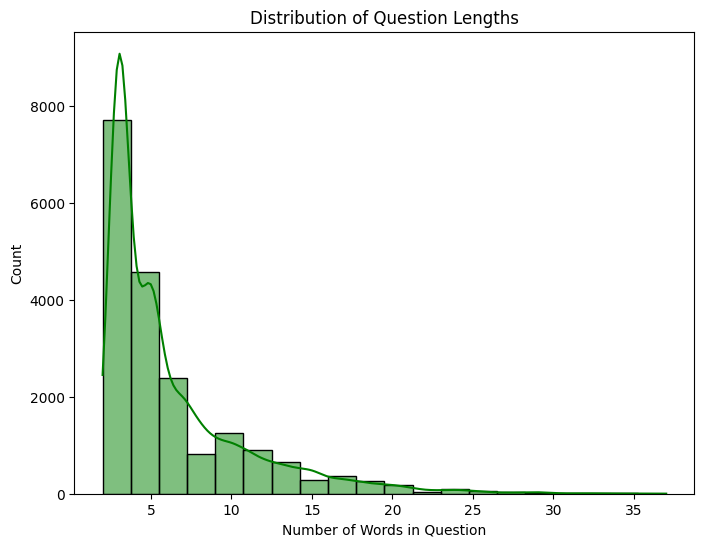

In [13]:
# Calculate the number of words in each question
df['question_length'] = df['question'].apply(lambda x: len(x.split()))

# Visualize the distribution of question lengths
plt.figure(figsize=(8, 6))
sns.histplot(df['question_length'], bins=20, kde=True, color='green')
plt.title('Distribution of Question Lengths')
plt.xlabel('Number of Words in Question')
plt.ylabel('Count')
plt.show()

<ipython-input-14-b079a0acc707>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_words_df, palette='inferno')


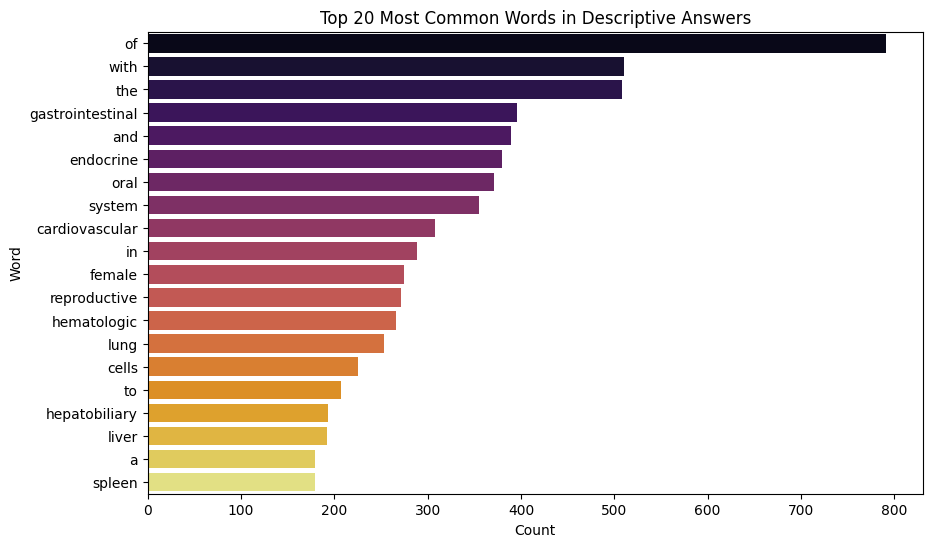

In [14]:
from collections import Counter

# Filter descriptive answers and tokenize words
descriptive_answers = df[df['answer_type'] == 'Descriptive']['answer']
words = ' '.join(descriptive_answers).lower().split()

# Get the top N most common words
top_words = Counter(words).most_common(20)

# Convert to DataFrame for easier plotting
top_words_df = pd.DataFrame(top_words, columns=['word', 'count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=top_words_df, palette='inferno')
plt.title('Top 20 Most Common Words in Descriptive Answers')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

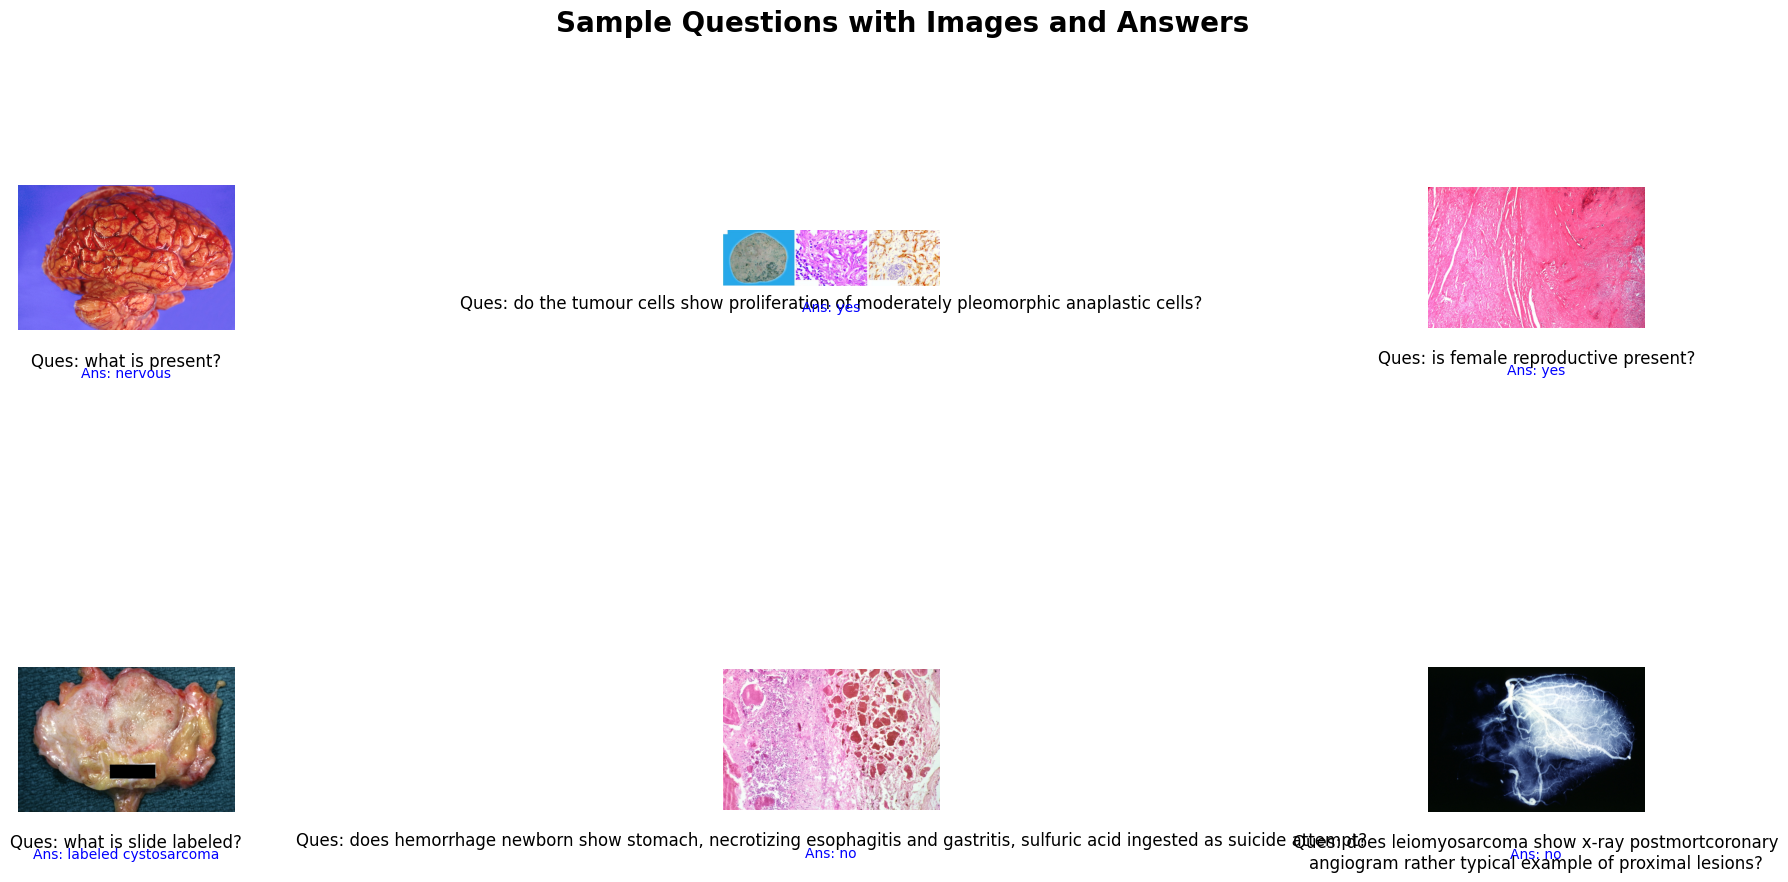

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import io

# Number of samples to display
num_samples = 6  # Adjusted for a 2x3 grid

# Select random samples from the dataset
sample_df = df.sample(num_samples)

# Create a figure with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # Wider figure for better spacing

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, (idx, data) in enumerate(sample_df.iterrows()):
    # Get the image bytes
    image_bytes = data['image']['bytes']  # Access the bytes directly

    # Convert the bytes to an image
    image = Image.open(io.BytesIO(image_bytes))  # Use io.BytesIO to convert bytes to an image

    # Display the image
    axes[i].imshow(image)
    axes[i].axis('off')  # Hide axis

    # Add question and answer below the image using `annotate` for more control
    y_pos = -0.15  # Adjust y position for question text
    axes[i].annotate(f"Ques: {data['question']}", xy=(0.5, y_pos), xycoords='axes fraction',
                     fontsize=12, ha='center', va='top', wrap=True)

    y_pos -= 0.1  # Adjust y position for answer text
    axes[i].annotate(f"Ans: {data['answer']}", xy=(0.5, y_pos), xycoords='axes fraction',
                     fontsize=10, ha='center', color='blue', va='top', wrap=True)

# Set the title for the entire figure
plt.suptitle('Sample Questions with Images and Answers', fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for better spacing
plt.subplots_adjust(hspace=0.5)  # Increase space between rows for clarity
plt.show()

In [ ]:
from PIL import Image
from tqdm import tqdm
from datasets import DatasetDict

def resize_image(example, target_size=(244, 244)):
    image = example['image']

    resized_image = image.resize(target_size)

    example['image'] = resized_image
    return example

def resize_with_progress(ds_split, split_name, target_size=(244, 244)):
    return ds_split.map(lambda x: resize_image(x, target_size),
                        desc=f'Resizing {split_name} images',
                        batched=False)

# Apply the resizing with progress bars for all splits
ds['train'] = resize_with_progress(ds['train'], 'train', target_size=(244, 244))
ds['validation'] = resize_with_progress(ds['validation'], 'validation', target_size=(244, 244))
ds['test'] = resize_with_progress(ds['test'], 'test', target_size=(244, 244))

Resizing train images:   0%|          | 0/19654 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Resizing validation images:   0%|          | 0/6259 [00:00<?, ? examples/s]

Resizing test images:   0%|          | 0/6719 [00:00<?, ? examples/s]

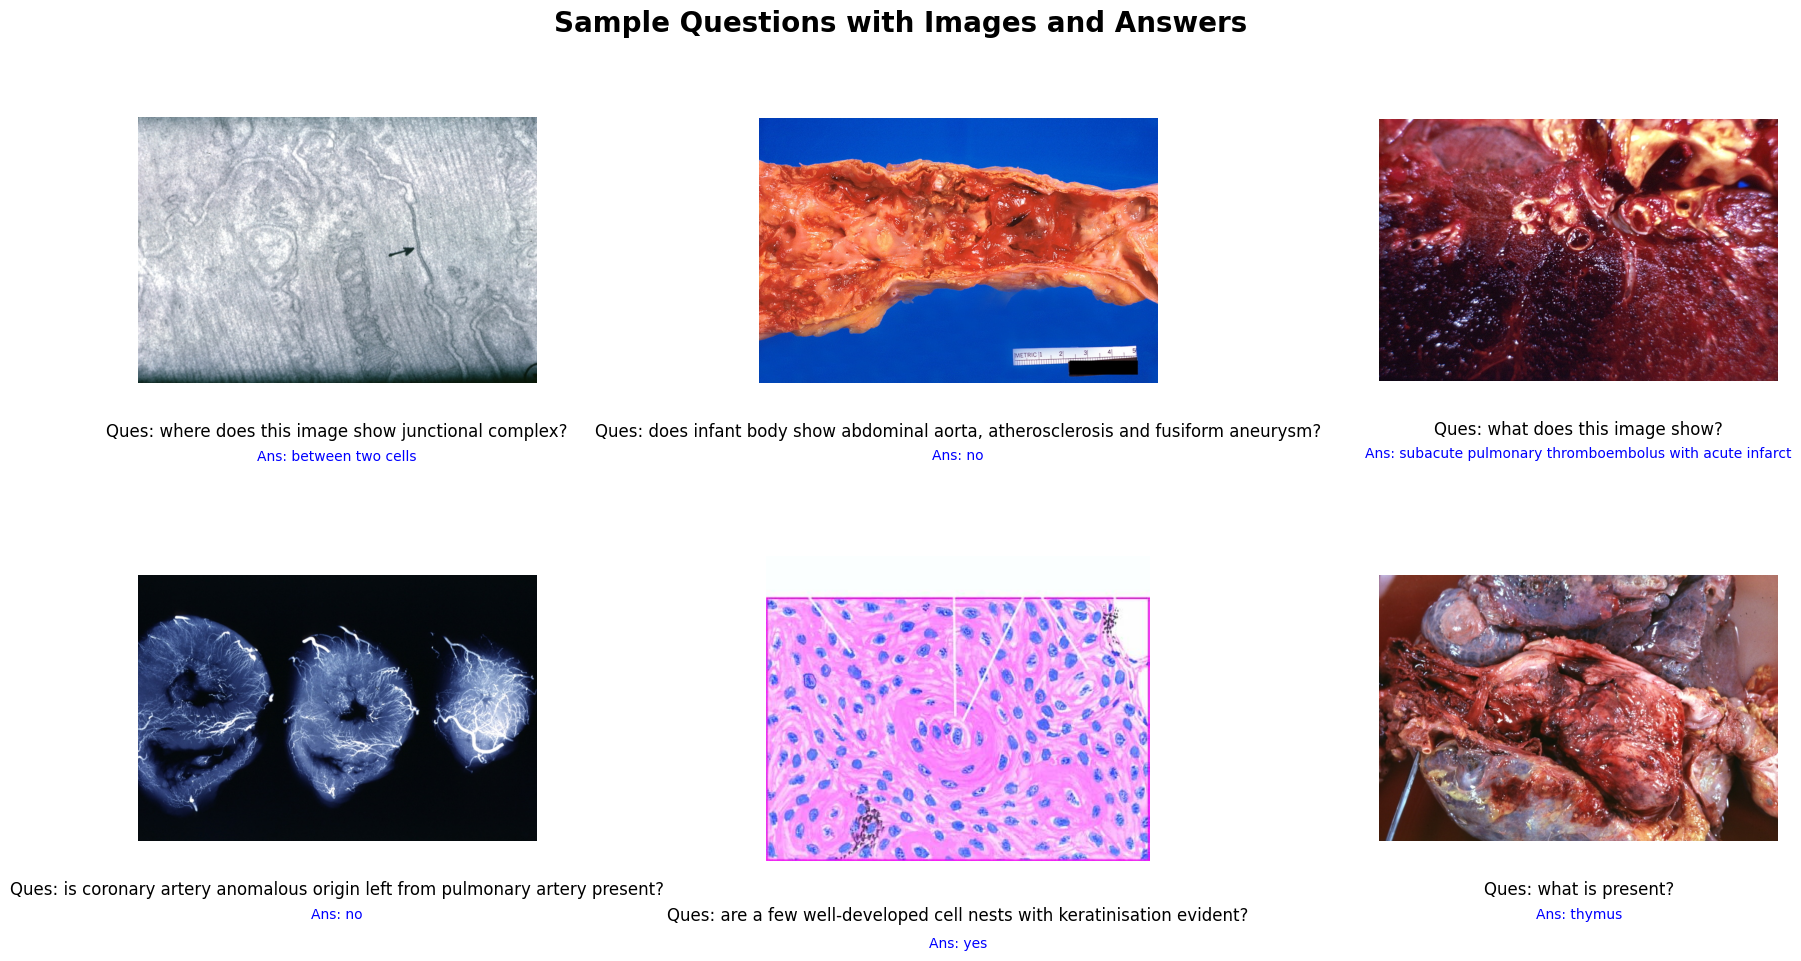

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import io

# Number of samples to display
num_samples = 6  # Adjusted for a 2x3 grid

# Select random samples from the dataset
sample_df = df.sample(num_samples)

# Create a figure with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # Wider figure for better spacing

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, (idx, data) in enumerate(sample_df.iterrows()):
    # Get the image bytes
    image_bytes = data['image']['bytes']  # Access the bytes directly

    # Convert the bytes to an image
    image = Image.open(io.BytesIO(image_bytes))  # Use io.BytesIO to convert bytes to an image

    # Display the image
    axes[i].imshow(image)
    axes[i].axis('off')  # Hide axis

    # Add question and answer below the image using `annotate` for more control
    y_pos = -0.15  # Adjust y position for question text
    axes[i].annotate(f"Ques: {data['question']}", xy=(0.5, y_pos), xycoords='axes fraction',
                     fontsize=12, ha='center', va='top', wrap=True)

    y_pos -= 0.1  # Adjust y position for answer text
    axes[i].annotate(f"Ans: {data['answer']}", xy=(0.5, y_pos), xycoords='axes fraction',
                     fontsize=10, ha='center', color='blue', va='top', wrap=True)

# Set the title for the entire figure
plt.suptitle('Sample Questions with Images and Answers', fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for better spacing
plt.subplots_adjust(hspace=0.5)  # Increase space between rows for clarity
plt.show()

Processing Images: 100%|██████████| 19654/19654 [03:15<00:00, 100.74it/s]


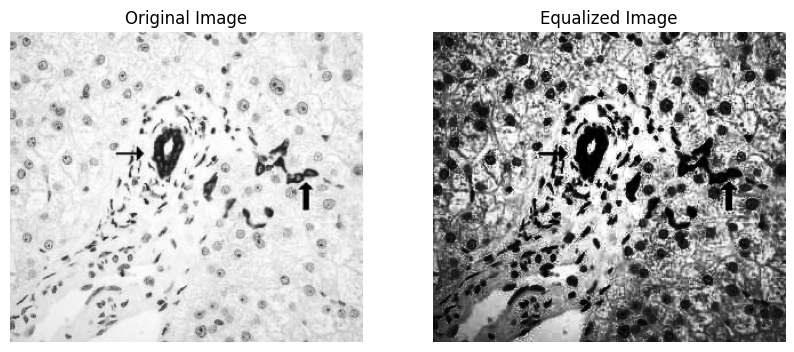

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def equalize_image(image_bytes):
    image_array = np.frombuffer(image_bytes, dtype=np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)

    equalized_image = cv2.equalizeHist(image)

    return equalized_image

equalized_images = []

for image in tqdm(df['image'], desc="Processing Images"):
    image_bytes = image['bytes']
    equalized_image = equalize_image(image_bytes)
    equalized_images.append(equalized_image)

plt.figure(figsize=(10, 5))

image_bytes = df['image'][0]['bytes']
image_array = np.frombuffer(image_bytes, dtype=np.uint8)
original_image = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_images[0], cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.show()